In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.feature_selection import chi2,mutual_info_classif,f_classif,RFE,VarianceThreshold
from mlxtend.feature_selection import SequentialFeatureSelector,ExhaustiveFeatureSelector

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression,Lasso,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.decomposition import PCA


from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### problem statement

### Data Gathering

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Exploratory Data Analysis

In [5]:
def datainfo(dataframe):
    print("Churn Model Data :\n")
    print("Number of features: ",df.shape[1],"\n")
    print("Number of data points: ",df.shape[0],"\n")
    print("Number of missing values: ",df.isna().sum().values.sum(),"\n")
    print("Unique values:\n ")
    print(df.nunique())

In [6]:
datainfo(df)

Churn Model Data :

Number of features:  21 

Number of data points:  7043 

Number of missing values:  0 

Unique values:
 
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<AxesSubplot: xlabel='Churn', ylabel='count'>

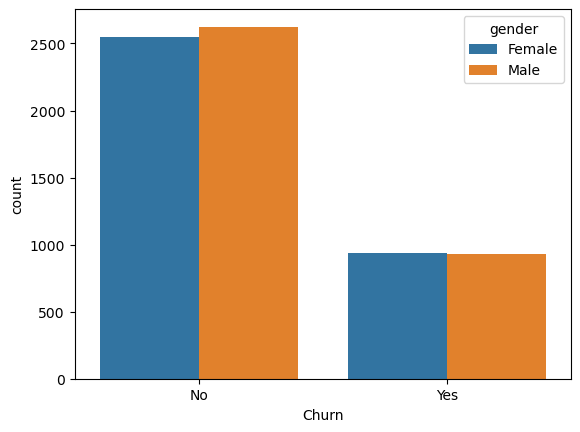

In [8]:
sns.countplot(x='Churn',data=df,hue='gender')

<AxesSubplot: xlabel='SeniorCitizen', ylabel='count'>

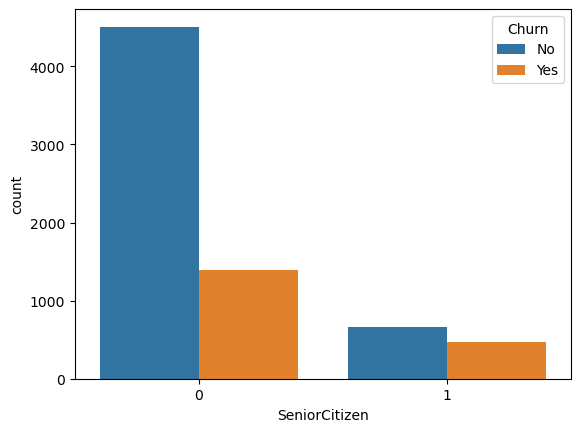

In [9]:
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')

<AxesSubplot: xlabel='Churn', ylabel='count'>

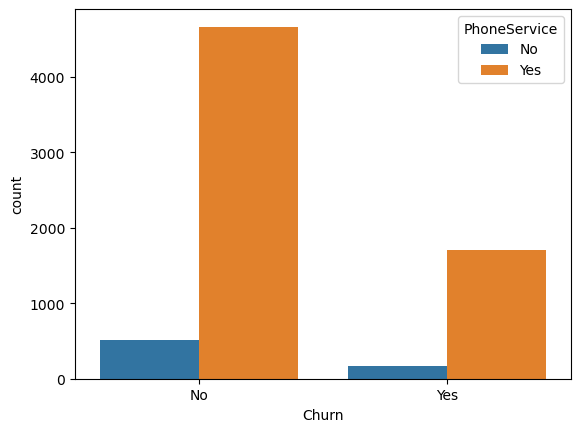

In [10]:
sns.countplot(x='Churn',data=df,hue='PhoneService')

<AxesSubplot: xlabel='SeniorCitizen', ylabel='Count'>

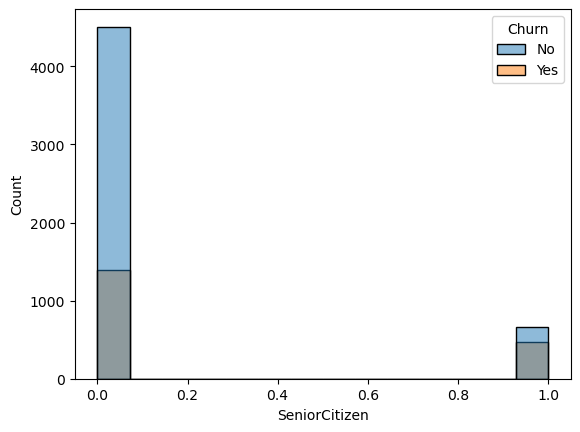

In [11]:
sns.histplot(x='SeniorCitizen',data=df,hue='Churn')

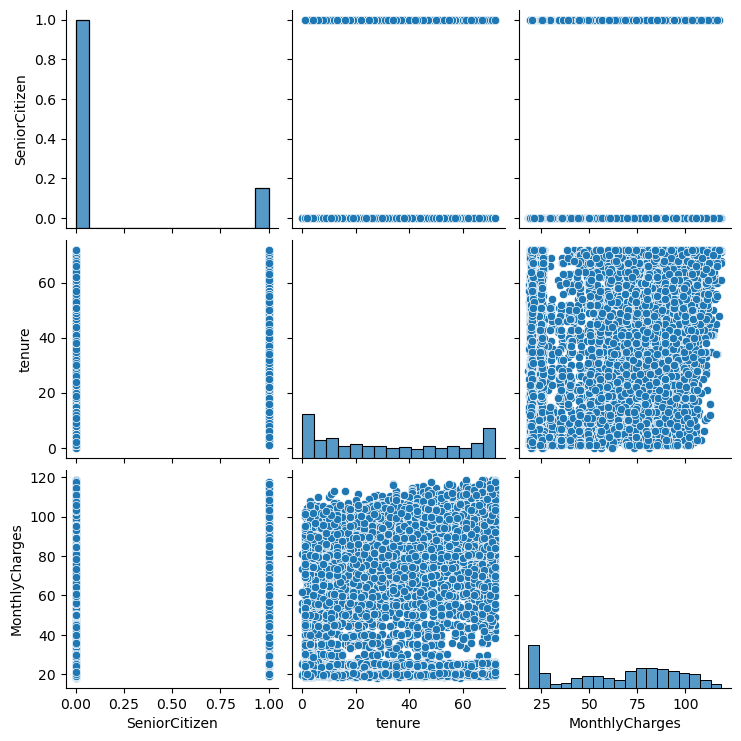

In [12]:
sns.pairplot(df)

<AxesSubplot: xlabel='Churn', ylabel='Count'>

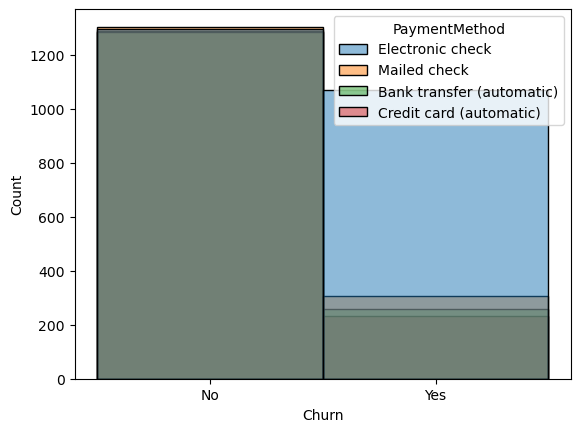

In [13]:
sns.histplot(x='Churn',data=df,hue='PaymentMethod')

<AxesSubplot: xlabel='gender', ylabel='Count'>

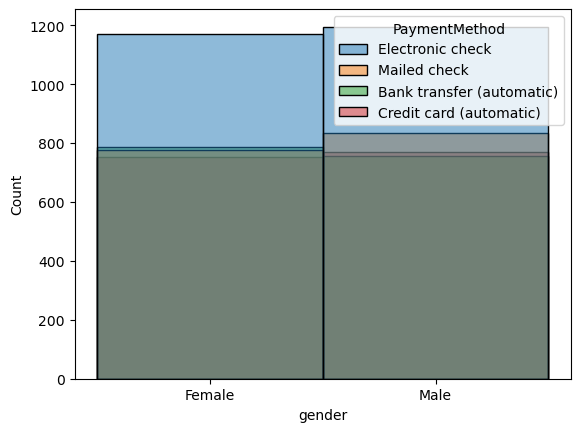

In [14]:
sns.histplot(x='gender',data=df,hue='PaymentMethod')

<AxesSubplot: xlabel='tenure', ylabel='MonthlyCharges'>

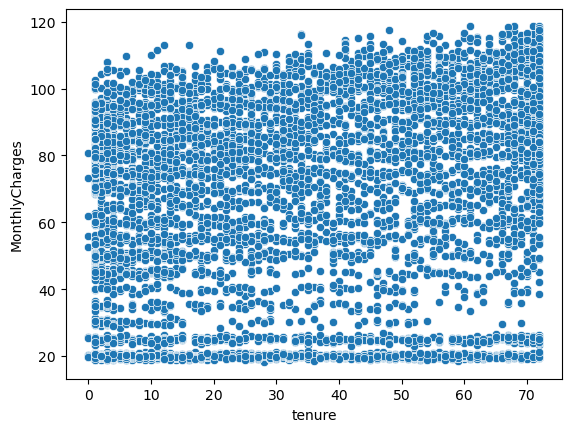

In [15]:
sns.scatterplot(x='tenure',y='MonthlyCharges',data=df)

<AxesSubplot: xlabel='Churn', ylabel='count'>

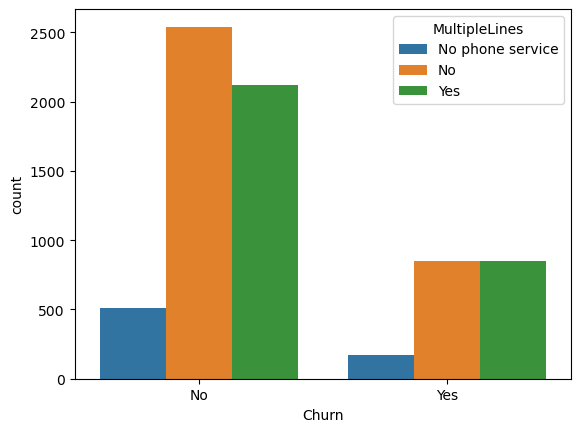

In [16]:
sns.countplot(x=df['Churn'],hue=df['MultipleLines'])

<AxesSubplot: xlabel='Churn', ylabel='count'>

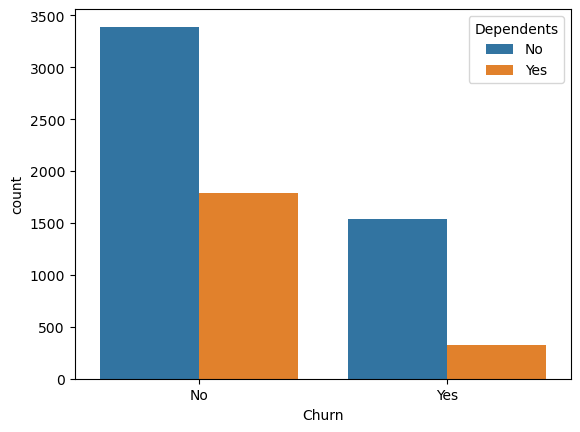

In [17]:
sns.countplot(x=df['Churn'],hue=df['Dependents'])

In [18]:
datainfo(df)

Churn Model Data :

Number of features:  21 

Number of data points:  7043 

Number of missing values:  0 

Unique values:
 
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


<AxesSubplot: >

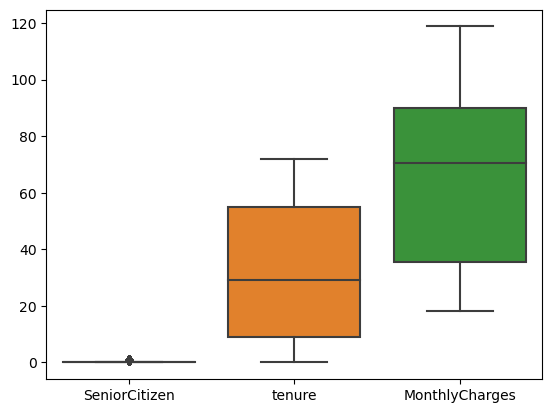

In [19]:
sns.boxplot(df)

<AxesSubplot: >

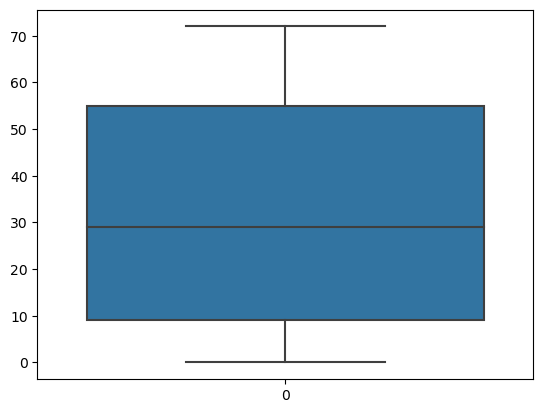

In [20]:
sns.boxplot(df['tenure'])

<AxesSubplot: >

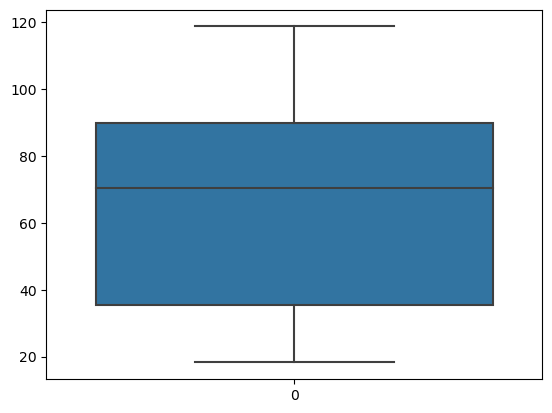

In [21]:
sns.boxplot(df['MonthlyCharges'])

In [22]:
sns.boxplot(df['TotalCharges']) #There are string values in TotalCharges

ValueError: could not convert string to float: ''

In [23]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [24]:
import re
def func(x):
    if type(x)==str and len(x)>0:
        return re.sub("[^0-9.]",'',x)

In [25]:
df['TotalCharges'] = df['TotalCharges'].apply(func)

In [26]:
df['TotalCharges'] = df['TotalCharges'].replace('',np.nan)

In [27]:
df['TotalCharges'].isna().mean()*100

0.1561834445548772

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

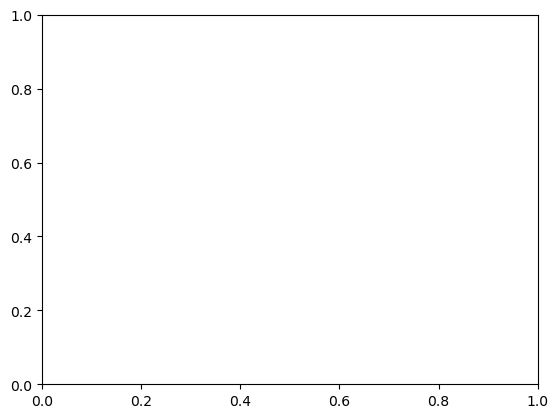

In [28]:
sns.kdeplot(df['TotalCharges'])

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [29]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

<AxesSubplot: >

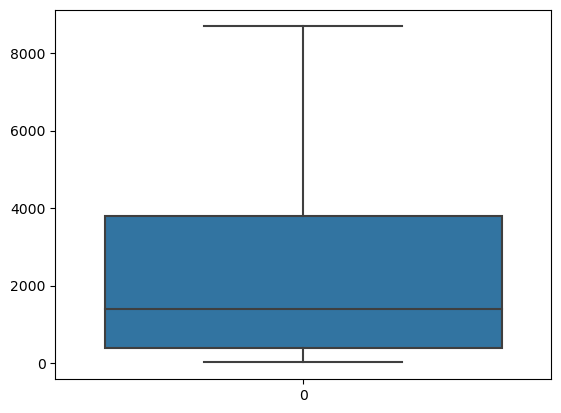

In [30]:
sns.boxplot(df['TotalCharges'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Feature Engineernig

##### feature encoding

#### 1.gender

In [32]:
df['gender'].value_counts().to_dict()

{'Male': 3555, 'Female': 3488}

In [33]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

#### 2.Partner

In [34]:
df['Partner'].value_counts().to_dict()

{'No': 3641, 'Yes': 3402}

In [35]:
df['Partner'] = df['Partner'].replace({'No': 1, 'Yes': 0})

#### 3.Dependents

In [36]:
df['Dependents'].value_counts().to_dict()

{'No': 4933, 'Yes': 2110}

In [37]:
df['Dependents'] = df['Dependents'].replace({'No': 1, 'Yes': 0})

#### 4.PhoneService

In [38]:
df['PhoneService'].value_counts().to_dict()

{'Yes': 6361, 'No': 682}

In [39]:
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})

#### 5.MultipleLines

In [40]:
df['MultipleLines'].value_counts().to_dict()

{'No': 3390, 'Yes': 2971, 'No phone service': 682}

In [41]:
df['MultipleLines'] = df['MultipleLines'].replace({'No': 2, 'Yes': 1, 'No phone service': 0})

#### 6.InternetService

In [42]:
df['InternetService'].value_counts().to_dict()

{'Fiber optic': 3096, 'DSL': 2421, 'No': 1526}

In [43]:
df['InternetService'] = df['InternetService'].replace({'Fiber optic': 2, 'DSL': 1, 'No': 0})

#### 7.OnlineSecurity

In [44]:
df['OnlineSecurity'].value_counts().to_dict()

{'No': 3498, 'Yes': 2019, 'No internet service': 1526}

In [45]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No': 2, 'Yes': 1, 'No internet service': 0})

#### 8.OnlineBackup

In [46]:
df['OnlineBackup'].value_counts().to_dict()

{'No': 3088, 'Yes': 2429, 'No internet service': 1526}

In [47]:
df['OnlineBackup'] = df['OnlineBackup'].replace({'No': 2, 'Yes': 1, 'No internet service': 0})

#### 9.DeviceProtection

In [48]:
df['DeviceProtection'].value_counts().to_dict()

{'No': 3095, 'Yes': 2422, 'No internet service': 1526}

In [49]:
df['DeviceProtection'] = df['DeviceProtection'].replace({'No': 2, 'Yes': 1, 'No internet service': 0}) 

#### 10.TechSupport

In [50]:
df['TechSupport'].value_counts().to_dict()

{'No': 3473, 'Yes': 2044, 'No internet service': 1526}

In [51]:
df['TechSupport'] = df['TechSupport'].replace({'No': 2, 'Yes': 1, 'No internet service': 0})

#### 11.StreamingTV

In [52]:
df['StreamingTV'].value_counts().to_dict()

{'No': 2810, 'Yes': 2707, 'No internet service': 1526}

In [53]:
df['StreamingTV'] = df['StreamingTV'].replace({'No': 2, 'Yes': 1, 'No internet service': 0})

#### 12.StreamingMovies

In [54]:
df['StreamingMovies'].value_counts().to_dict()

{'No': 2785, 'Yes': 2732, 'No internet service': 1526}

In [55]:
df['StreamingMovies'] = df['StreamingMovies'].replace({'No': 2, 'Yes': 1, 'No internet service': 0})

#### 13.Contract

In [56]:
df['Contract'].value_counts().to_dict()

{'Month-to-month': 3875, 'Two year': 1695, 'One year': 1473}

In [57]:
df['Contract'] = df['Contract'].replace({'Month-to-month': 3, 'Two year': 2, 'One year': 1})

#### 14.PaperlessBilling

In [58]:
df['PaperlessBilling'].value_counts().to_dict()

{'Yes': 4171, 'No': 2872}

In [59]:
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

#### 15.PaymentMethod

In [60]:
df['PaymentMethod'].value_counts().to_dict()

{'Electronic check': 2365,
 'Mailed check': 1612,
 'Bank transfer (automatic)': 1544,
 'Credit card (automatic)': 1522}

In [61]:
df = pd.get_dummies(df,columns=['PaymentMethod'])  

#### 16.Churn

In [62]:
df['Churn'].value_counts().to_dict()

{'No': 5174, 'Yes': 1869}

In [63]:
df['Churn']  = df['Churn'].replace({'No': 0, 'Yes': 1})

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,0,1,1,0,0,1,2,...,2,3,1,29.85,29.85,0,0,0,1,0
1,5575-GNVDE,1,0,1,1,34,1,2,1,1,...,2,1,0,56.95,1889.50,0,0,0,0,1
2,3668-QPYBK,1,0,1,1,2,1,2,1,1,...,2,3,1,53.85,108.15,1,0,0,0,1
3,7795-CFOCW,1,0,1,1,45,0,0,1,1,...,2,1,0,42.30,1840.75,0,1,0,0,0
4,9237-HQITU,0,0,1,1,2,1,2,2,2,...,2,3,1,70.70,151.65,1,0,0,1,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   InternetService                          7043 non-null   int64  
 9   OnlineSecurity                           7043 non-null   int64  
 10  OnlineBackup                             7043 no

In [66]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.516967,0.700412,32.371149,0.903166,1.384495,1.222916,1.279994,1.221780,...,1.178759,2.341048,0.592219,64.761692,2283.300441,0.265370,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,0.778472,...,0.761725,0.801943,0.491457,30.090047,2266.771362,0.441561,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,1.000000,89.850000,3794.737500,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
x

NameError: name 'x' is not defined

In [69]:
x = df.drop(['gender','PhoneService','MultipleLines','customerID','Churn'],axis=1)
y  = df['Churn']

In [70]:
x

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,1,2,1,2,2,2,2,3,1,29.85,29.85,0,0,1,0
1,0,1,1,34,1,1,2,1,2,2,2,1,0,56.95,1889.50,0,0,0,1
2,0,1,1,2,1,1,1,2,2,2,2,3,1,53.85,108.15,0,0,0,1
3,0,1,1,45,1,1,2,1,1,2,2,1,0,42.30,1840.75,1,0,0,0
4,0,1,1,2,2,2,2,2,2,2,2,3,1,70.70,151.65,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,24,1,1,2,1,1,1,1,1,1,84.80,1990.50,0,0,0,1
7039,0,0,0,72,2,2,1,1,2,1,1,1,1,103.20,7362.90,0,1,0,0
7040,0,0,0,11,1,1,2,2,2,2,2,3,1,29.60,346.45,0,0,1,0
7041,1,0,1,4,2,2,2,2,2,2,2,3,1,74.40,306.60,0,0,0,1


In [71]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [73]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

##### scaling

In [74]:
scaler = StandardScaler()
array = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(array,columns=x.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns=x.columns)

In [75]:
x_train_scaled

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.438147,0.962957,0.650862,-1.114728,0.994298,0.906627,1.006688,1.007401,0.915605,-0.227907,1.085390,0.824341,-1.205295,0.504286,-0.837938,-0.531524,-0.525557,1.407357,-0.543123
1,2.282338,0.962957,0.650862,-1.195884,0.994298,0.906627,1.006688,-0.279921,0.915605,-0.227907,1.085390,0.824341,0.829672,0.724189,-0.909176,-0.531524,-0.525557,1.407357,-0.543123
2,-0.438147,-1.038468,0.650862,-1.195884,0.994298,0.906627,1.006688,1.007401,0.915605,1.089307,1.085390,0.824341,0.829672,0.337292,-0.911008,-0.531524,1.902743,-0.710552,-0.543123
3,-0.438147,0.962957,0.650862,1.117066,-0.288583,0.906627,1.006688,-0.279921,-0.342809,-0.227907,-0.230315,-1.668912,-1.205295,0.515860,1.108912,-0.531524,1.902743,-0.710552,-0.543123
4,-0.438147,0.962957,0.650862,-0.830682,0.994298,-0.349251,1.006688,1.007401,-0.342809,-0.227907,-0.230315,0.824341,0.829672,1.122660,-0.516560,1.881381,-0.525557,-0.710552,-0.543123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-0.438147,0.962957,0.650862,1.238800,0.994298,-0.349251,-0.280390,-0.279921,-0.342809,-0.227907,1.085390,-1.668912,-1.205295,1.307841,1.869605,-0.531524,1.902743,-0.710552,-0.543123
4926,-0.438147,0.962957,0.650862,-1.277041,-0.288583,-0.349251,1.006688,1.007401,0.915605,1.089307,1.085390,0.824341,-1.205295,-0.453036,-0.983206,-0.531524,-0.525557,-0.710552,1.841203
4927,-0.438147,-1.038468,0.650862,1.563425,0.994298,0.906627,-0.280390,-0.279921,-0.342809,-0.227907,-0.230315,-0.422285,-1.205295,1.464915,2.356841,-0.531524,-0.525557,1.407357,-0.543123
4928,-0.438147,-1.038468,0.650862,-0.343745,-1.571465,-1.605129,-1.567468,-1.567243,-1.601223,-1.545121,-1.546021,-1.668912,-1.205295,-1.473187,-0.794947,-0.531524,1.902743,-0.710552,-0.543123


In [76]:
x_test_scaled

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.438147,0.962957,0.650862,-0.587213,0.994298,-0.349251,1.006688,1.007401,0.915605,-0.227907,-0.230315,0.824341,0.829672,1.028416,-0.246201,-0.531524,-0.525557,1.407357,-0.543123
1,-0.438147,-1.038468,-1.536424,-0.992994,-1.571465,-1.605129,-1.567468,-1.567243,-1.601223,-1.545121,-1.546021,-0.422285,-1.205295,-1.517829,-0.917574,-0.531524,-0.525557,-0.710552,1.841203
2,2.282338,0.962957,0.650862,-0.506057,0.994298,0.906627,1.006688,-0.279921,0.915605,-0.227907,-0.230315,0.824341,0.829672,1.111086,-0.201661,-0.531524,-0.525557,1.407357,-0.543123
3,-0.438147,0.962957,0.650862,-0.506057,-1.571465,-1.605129,-1.567468,-1.567243,-1.601223,-1.545121,-1.546021,-0.422285,0.829672,-1.496335,-0.822604,-0.531524,-0.525557,-0.710552,1.841203
4,-0.438147,-1.038468,-1.536424,0.305504,-1.571465,-1.605129,-1.567468,-1.567243,-1.601223,-1.545121,-1.546021,-0.422285,-1.205295,-1.499642,-0.652667,-0.531524,-0.525557,-0.710552,1.841203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,-0.438147,-1.038468,-1.536424,-0.303167,-1.571465,-1.605129,-1.567468,-1.567243,-1.601223,-1.545121,-1.546021,-1.668912,-1.205295,-1.484761,-0.778675,-0.531524,-0.525557,-0.710552,1.841203
2109,-0.438147,-1.038468,-1.536424,1.441690,-0.288583,0.906627,-0.280390,-0.279921,-0.342809,-0.227907,-0.230315,-0.422285,-1.205295,-0.153769,0.786946,-0.531524,1.902743,-0.710552,-0.543123
2110,-0.438147,0.962957,0.650862,0.102614,-0.288583,-0.349251,-0.280390,-0.279921,0.915605,1.089307,1.085390,-1.668912,-1.205295,-0.124008,-0.123836,-0.531524,-0.525557,-0.710552,1.841203
2111,2.282338,-1.038468,0.650862,-0.790104,-0.288583,0.906627,1.006688,1.007401,0.915605,-0.227907,-0.230315,0.824341,-1.205295,-0.649791,-0.775032,-0.531524,-0.525557,1.407357,-0.543123


#### Sampling

In [ ]:
smote = SMOTE(sampling_strategy=0.9,
              random_state=12,
              k_neighbors=5,
              n_jobs=-1,)

x_array,y_array = smote.fit_resample(x_train_scaled,y_train)
x_train_sampled = pd.DataFrame(x_array,columns=x_train_scaled.columns)
y_train_sampled = pd.Series(y_array)

In [ ]:
y_train_sampled.value_counts()

### Feature Selection

##### 1.Filter methods

### 1.Correlation

In [77]:
df.corr(method='pearson')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,0.001808,-0.010517,0.005106,-0.006488,0.000485,-0.010380,0.003429,0.002032,...,0.000191,-0.006171,-0.011754,-0.014569,0.000048,-0.008612,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,-0.016479,0.211185,0.016567,0.008576,-0.099883,0.259390,0.210897,0.152780,...,0.120802,0.109299,0.156530,0.220173,0.102411,0.150889,-0.016159,-0.024135,0.171718,-0.153477
Partner,0.001808,-0.016479,1.000000,0.452676,-0.379697,-0.017706,0.090981,0.000132,0.081850,0.087055,...,0.075779,0.216229,0.014877,-0.096848,-0.319072,0.150448,-0.110706,-0.082029,0.083852,0.095125
Dependents,-0.010517,0.211185,0.452676,1.000000,-0.159712,0.001762,-0.016875,0.179631,0.190523,0.162445,...,0.125820,0.178429,0.111377,0.113890,-0.064653,0.164221,-0.052021,-0.060267,0.150642,-0.059071
tenure,0.005106,0.016567,-0.379697,-0.159712,1.000000,0.008448,-0.242279,0.033230,-0.145298,-0.178651,...,-0.140781,-0.503232,0.006152,0.247900,0.825880,-0.352229,0.243510,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,-0.017706,0.001762,0.008448,1.000000,0.691070,0.093720,-0.125353,-0.150338,...,-0.165205,0.000955,0.016505,0.247398,0.113008,0.011942,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,0.000485,-0.099883,0.090981,-0.016875,-0.242279,0.691070,1.000000,-0.174989,-0.235021,-0.210372,...,-0.195815,0.040607,-0.108230,-0.146153,-0.251357,-0.019423,-0.050046,-0.052168,-0.060190,0.168056
InternetService,-0.010380,0.259390,0.000132,0.179631,0.033230,0.093720,-0.174989,1.000000,0.764943,0.686403,...,0.620005,0.203148,0.378108,0.905491,0.428212,0.316846,-0.013300,-0.032458,0.365104,-0.365534
OnlineSecurity,0.003429,0.210897,0.081850,0.190523,-0.145298,-0.125353,-0.235021,0.764943,1.000000,0.751661,...,0.704984,0.275864,0.334003,0.621227,0.153234,0.332819,-0.051817,-0.066737,0.358367,-0.286446
OnlineBackup,0.002032,0.152780,0.087055,0.162445,-0.178651,-0.150338,-0.210372,0.686403,0.751661,1.000000,...,0.716700,0.252097,0.262402,0.538454,0.085017,0.291449,-0.050891,-0.056526,0.301832,-0.233808


<AxesSubplot: >

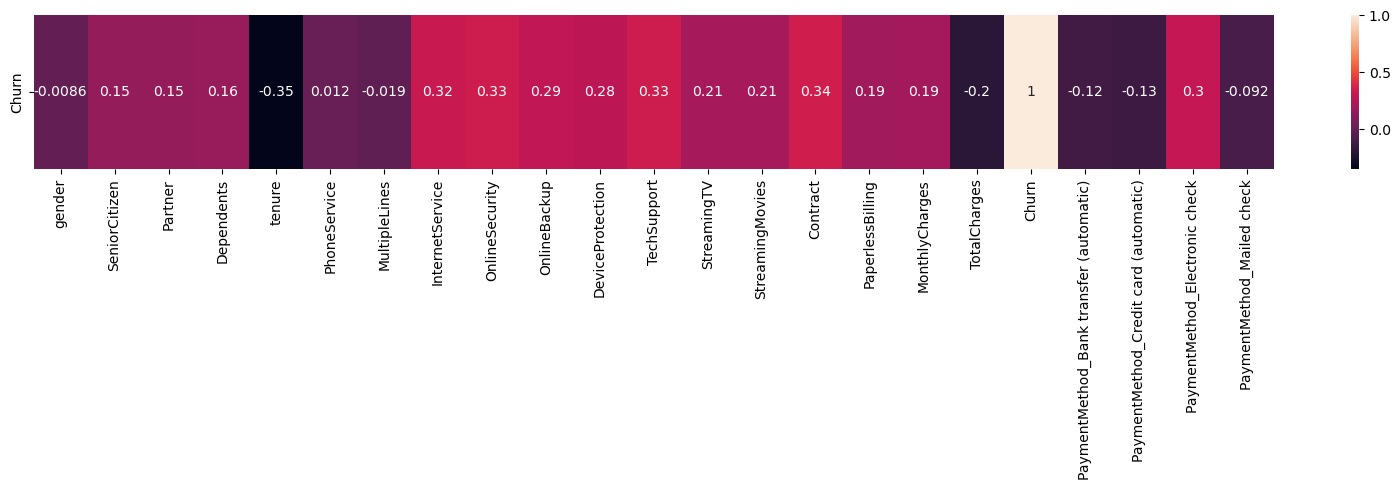

In [78]:
plt.figure(figsize=(20,2))
sns.heatmap(df.corr(method='pearson').tail(5)[0:1],annot=True)

<AxesSubplot: >

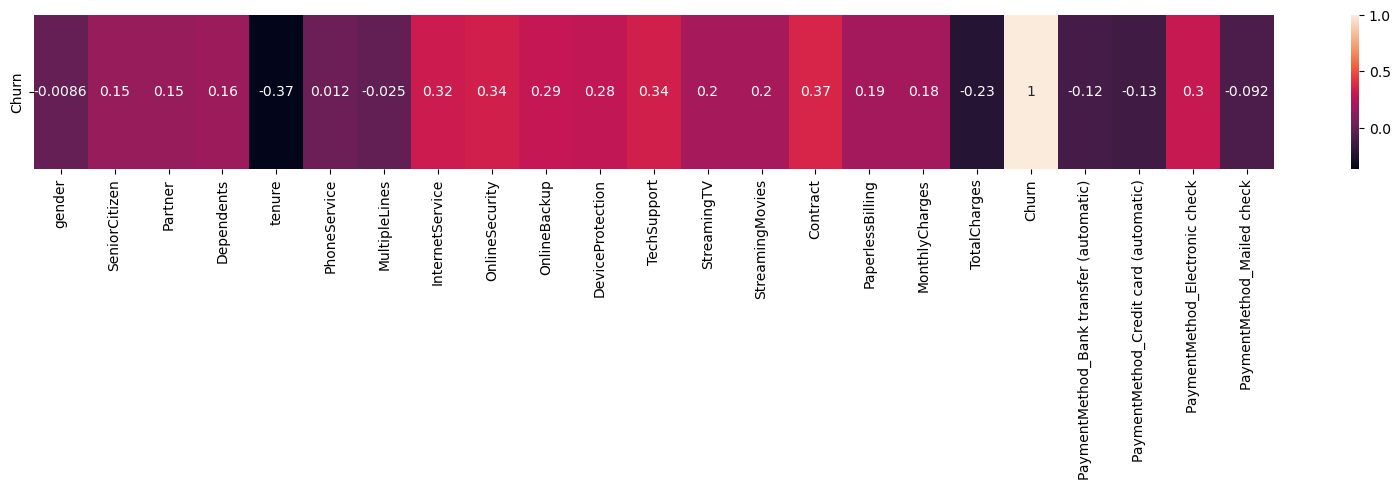

In [79]:
plt.figure(figsize=(20,2))
sns.heatmap(df.corr(method='spearman').tail(5)[0:1],annot=True)

<AxesSubplot: >

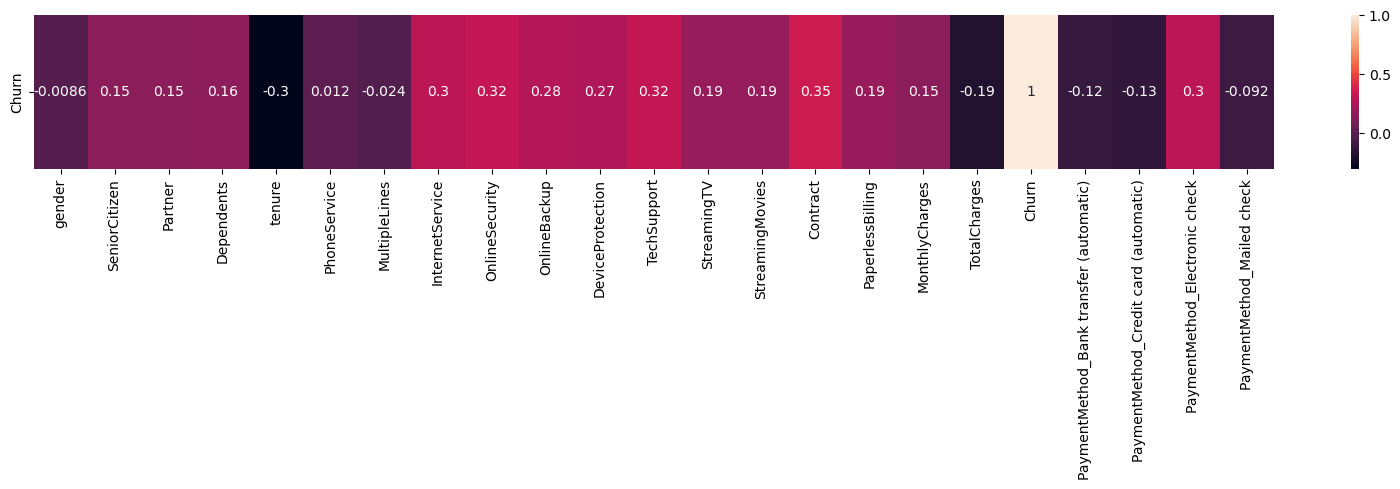

In [80]:
plt.figure(figsize=(20,2))
sns.heatmap(df.corr(method='kendall').tail(5)[0:1],annot=True)

#### 2.Chi2

In [83]:
chi2_val, p_val = chi2(x,y)
pd.DataFrame({'Chi2_values':np.around(chi2_val,4),
             'P_val':np.around(p_val,4)},index=x.columns).sort_values('Chi2_values')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### 3. ANOVA

In [82]:
f_val, p_val = f_classif(x,y)
pd.DataFrame({'f_values':np.around(f_val,4),
             'P_val':np.around(p_val,4)},index=x.columns).sort_values('f_values')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### 4.Mutual information

In [ ]:
info = mutual_info_classif(x,y)
pd.Series(info,index=x.columns).sort_values().plot(kind='barh')

In [ ]:
x_train_scaled = x_train_scaled.drop(['gender','PhoneService','MultipleLines'],axis=1)
x_test_scaled = x_test_scaled.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [ ]:
x

In [ ]:
x_train_scaled

In [ ]:
x_train_sampled

### Model Training

In [84]:
def model(algo,name):
    try:
        print("Model Name: ",name)
        model = algo(random_state=12)
        model.fit(x_train_scaled,y_train)

        y_train_pred = model.predict(x_train_scaled)

        print("Training Accuracy: ",model.score(x_train_scaled,y_train))
        print("Testing Accuracy: ",model.score(x_test_scaled,y_test))

        print("Classification report:\n ",classification_report(y_train,y_train_pred))

        cnf_matrix = confusion_matrix(y_train,y_train_pred)
        print("Confusion matrix:\n")
        ConfusionMatrixDisplay(cnf_matrix).plot()
        
    except:
        print("Model Name: ",name)
        model = algo()
        model.fit(x_train_scaled,y_train)

        y_train_pred = model.predict(x_train_scaled)

        print("Training Accuracy: ",model.score(x_train_scaled,y_train))
        print("Testing Accuracy: ",model.score(x_test_scaled,y_test))

        print("Classification report:\n ",classification_report(y_train,y_train_pred))

        cnf_matrix = confusion_matrix(y_train,y_train_pred)
        print("Confusion matrix:\n")
        ConfusionMatrixDisplay(cnf_matrix).plot()

In [85]:
def hypermodel(algo,best_parameter):
    print("Model Name: ",algo)
    model = best_parameter
    model.fit(x_train_scaled,y_train)

    y_train_pred = model.predict(x_train_scaled)

    print("Training Accuracy: ",model.score(x_train_scaled,y_train))
    print("Testing Accuracy: ",model.score(x_test_scaled,y_test))

    print("Classification report:\n ",classification_report(y_train,y_train_pred))

    cnf_matrix = confusion_matrix(y_train,y_train_pred)
    print("Confusion matrix:\n")
    ConfusionMatrixDisplay(cnf_matrix).plot()


### 1.Logistic

In [86]:
model(LogisticRegression,'Logistic Regression')

Model Name:  Logistic Regression
Model Name:  Logistic Regression


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [88]:
log_clf = LogisticRegression(random_state=12)

hyperparameter = {'penalty':['l1','l2'],
                 'C':np.arange(0.001,1,0.001),
                 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

rscv_log_clf = RandomizedSearchCV(log_clf,hyperparameter,cv=5,n_jobs=-1)
rscv_log_clf.fit(x_train_scaled,y_train_sampled)
rscv_log_clf.best_estimator_

log_clf.fit(x_train_scaled,y_train)
log_clf.score(x_test_scaled,y_test)

NameError: name 'y_train_sampled' is not defined

In [ ]:
hypermodel(LogisticRegression,rscv_log_clf.best_estimator_)

### 2.KNN

In [ ]:
model(KNeighborsClassifier,'KNN')

In [ ]:
knn_clf = KNeighborsClassifier()

hyperparameter = {'n_neighbors':np.arange(1,31),
                 'p':[1,2]}

rscv_knn_clf = RandomizedSearchCV(knn_clf,hyperparameter,cv=5,n_jobs=-1)
rscv_knn_clf.fit(x_train_scaled,y_train)
rscv_knn_clf.best_estimator_

In [ ]:
hypermodel(KNeighborsClassifier,rscv_knn_clf.best_estimator_)

In [ ]:
train_accuracy = []
test_accuracy = []

for i in np.arange(1,31):
    model = KNeighborsClassifier(n_neighbors=i,p=1)
    model.fit(x_train_scaled,y_train)
    
    train_accuracy.append(model.score(x_train_scaled,y_train))
    test_accuracy.append(model.score(x_test_scaled,y_test))
    
    
plt.plot(np.arange(1,31),train_accuracy)
plt.plot(np.arange(1,31),test_accuracy)
plt.legend(['train accuracy','test accuracy'])
plt.show()

In [ ]:
train_accuracy = []
test_accuracy = []

for i in np.arange(1,31):
    model = KNeighborsClassifier(n_neighbors=i,p=2)
    model.fit(x_train_scaled,y_train)
    
    train_accuracy.append(model.score(x_train_scaled,y_train))
    test_accuracy.append(model.score(x_test_scaled,y_test))
    
    
plt.plot(np.arange(1,31),train_accuracy)
plt.plot(np.arange(1,31),test_accuracy)
plt.legend(['train accuracy','test accuracy'])
plt.show()

### 3. SVM

In [ ]:
model(SVC,'svm')

In [ ]:
svm_clf = SVC(random_state=12)

hyperparameter = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                 'C':np.arange(0.001,1,0.001)}

rscv_svm_clf = RandomizedSearchCV(svm_clf,hyperparameter,cv=5,n_jobs=-1)
rscv_svm_clf.fit(x_train_scaled,y_train)
rscv_svm_clf.best_estimator_

In [ ]:
hypermodel('SVC',rscv_svm_clf.best_estimator_)

### 4.DecisionTree

In [ ]:
model(DecisionTreeClassifier,'Decision Tree')

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=12)

hyperparameter =  { 'criterion':['gini','entropy'],
                    'max_depth':np.arange(2,10),
                    'min_samples_split':np.arange(3,20),
                    'min_samples_leaf':np.arange(3,30)}

rscv_dt_clf = GridSearchCV(dt_clf,hyperparameter,cv=5,n_jobs=-1)
rscv_dt_clf.fit(x_train_scaled,y_train)
rscv_dt_clf.best_estimator_

In [ ]:
hypermodel('Decision Tree',rscv_dt_clf.best_estimator_)

In [ ]:
dt_clf = rscv_dt_clf.best_estimator_

dt_clf.fit(x_train_scaled,y_train)

pd.Series(dt_clf.feature_importances_ , index = dt_clf.feature_names_in_).sort_values().plot(kind='barh')

### 5.Random Forest

In [ ]:
model(RandomForestClassifier,'Random Forest')

In [ ]:
rf_clf = RandomForestClassifier(random_state=12)

hyperparameter = {'n_estimators':np.arange(10,110,10),
                'criterion':['gini','entropy'],
                'max_depth':np.arange(2,10),
                'min_samples_split':np.arange(3,20),
                'min_samples_leaf':np.arange(3,20)}

rscv_rf_clf = RandomizedSearchCV(rf_clf,hyperparameter,cv=5,n_jobs=-1)
rscv_rf_clf.fit(x_train_scaled,y_train)
rscv_rf_clf.best_estimator_

rf_clf = rscv_rf_clf.best_estimator_
rf_clf.fit(x_train_scaled,y_train)

In [ ]:
hypermodel('Random forest',rscv_rf_clf.best_estimator_)

In [ ]:
pd.Series(rf_clf.feature_importances_,index=rf_clf.feature_names_in_).sort_values().plot(kind='barh')

### 6.Ada Boost

In [ ]:
model(AdaBoostClassifier,'AdaBoost')

In [ ]:
adb_clf = AdaBoostClassifier(random_state=12)

hyperparameter = {'n_estimators':np.arange(10,110,10),
                  'learning_rate':np.arange(0.001,1,0.001)}

rscv_adb_clf = RandomizedSearchCV(adb_clf,hyperparameter,cv=5,n_jobs=-1)
rscv_adb_clf.fit(x_train_scaled,y_train)
rscv_adb_clf.best_estimator_
adb_clf = rscv_adb_clf.best_estimator_

adb_clf.fit(x_train_scaled,y_train)

In [ ]:
hypermodel('AdaBoost',rscv_adb_clf.best_estimator_)

In [ ]:
pd.Series(adb_clf.feature_importances_,index=adb_clf.feature_names_in_).sort_values().plot(kind='barh')

In [ ]:
adb_clf.feature_importances_

### Wrapper Methods

##### 1. Forward feature selection

In [ ]:
log_clf = LogisticRegression(random_state=12)

sfs1 = SequentialFeatureSelector(estimator = log_clf,
                                 k_features=10,
                                 forward=True,
                                 floating=False,
                                 cv=5,
                                 n_jobs=-1)

sfs1.fit(x_train_scaled,y_train)
pd.DataFrame(sfs1.subsets_).T

In [ ]:
sfs1.k_feature_names_

##### 2. Backward feature selection

In [ ]:
log_clf = LogisticRegression(random_state=12)

sfs2 = SequentialFeatureSelector(estimator = log_clf,
                                 k_features=10,
                                 forward=False,
                                 cv=5,
                                 n_jobs=-1)

sfs2.fit(x_train_scaled,y_train)
pd.DataFrame(sfs2.subsets_).T

In [ ]:
sfs2.k_feature_names_

##### 3. Bi-Directional feature selection

In [ ]:
log_clf = LogisticRegression(random_state=12)

sfs3 = SequentialFeatureSelector(estimator = log_clf,
                                 k_features=10,
                                 forward=None,
                                 floating=True,
                                 cv=5,
                                 n_jobs=-1)

sfs3.fit(x_train_scaled,y_train)
pd.DataFrame(sfs3.subsets_).T

In [ ]:
sfs3.k_feature_names_

##### 4. Exhaustive feature selection

In [ ]:
log_clf = LogisticRegression(random_state=12)

efs = ExhaustiveFeatureSelector(estimator=log_clf,
                                min_features=1,
                                max_features=8,
                                print_progress=True,
                                scoring='accuracy',
                                cv=5,
                                n_jobs=-1)

efs.fit(x_train_scaled,y_train)

In [ ]:
efs

##### 5. Recursive feature selection

In [ ]:
log_clf = LogisticRegression(random_state=12)

rfe = RFE(estimator = log_clf,
    n_features_to_select= 10)

rfe.fit(x_train_scaled,y_train)
pd.DataFrame(rfe.get_support(),index=rfe.feature_names_in_)

### Model Evaluation

### Feature Extraction

In [ ]:
pca = PCA(n_components=None,random_state=42)

array = pca.fit_transform(x_train_scaled)

column_list = [f"PC{i}" for i in range(1,pca.n_components_+1)]

x_train_pca = pd.DataFrame(array,columns=column_list)
x_test_pca = pd.DataFrame(pca.transform(x_test_scaled),columns=column_list)

In [ ]:
x_train_pca

In [ ]:
x_test_pca

In [ ]:
log_clf = LogisticRegression(random_state=12)
log_clf.fit(x_train_pca,y_train)

print("Train accuracy: ",log_clf.score(x_train_pca,y_train))
print("Test accuracy: ",log_clf.score(x_test_pca,y_test))

In [ ]:
train_accuracy = []
test_accuracy = []

pca_range = np.arange(1,x_train_pca.shape[1]+1)

for i in pca_range:
    pca = PCA(n_components=i,random_state=42)
    array = pca.fit_transform(x_train_scaled)
    column_list = [f"PC{i}" for i in range(1,pca.n_components_+1)]
    print(column_list)
    x_train_pca = pd.DataFrame(array,columns = column_list)
    x_test_pca = pd.DataFrame(pca.transform(x_test_scaled),columns=column_list)
    
    log_clf = LogisticRegression(random_state=12)
    log_clf.fit(x_train_pca,y_train)
    
    train_accuracy.append(log_clf.score(x_train_pca,y_train))
    test_accuracy.append(log_clf.score(x_test_pca,y_test))
    
plt.plot(pca_range,train_accuracy)
plt.plot(pca_range,test_accuracy)
plt.legend(['train accuracy','test accuracy'])
plt.show

In [ ]:
adb_clf

### Model Deployment

In [ ]:
log_clf

In [ ]:
import pickle
import json
import os

In [ ]:
pickle.dump(log_clf,open("model.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl",'wb'))

In [ ]:
log_clf

In [ ]:
list(x_train_scaled.columns)

In [ ]:
feature = {"features":list(x_train_scaled.columns),
          'Partner':{'No': 1, 'Yes': 0},
          'Dependents':{'No': 1, 'Yes': 0},
          'InternetService':{'Fiber optic': 2, 'DSL': 1, 'No': 0},
          'OnlineSecurity':{'No': 2, 'Yes': 1, 'No internet service': 0},
          'OnlineBackup':{'No': 2, 'Yes': 1, 'No internet service': 0},
          'DeviceProtection':{'No': 2, 'Yes': 1, 'No internet service': 0},
          'TechSupport':{'No': 2, 'Yes': 1, 'No internet service': 0},
          'StreamingTV':{'No': 2, 'Yes': 1, 'No internet service': 0},
          'StreamingMovies':{'No': 2, 'Yes': 1, 'No internet service': 0},
          'Contract':{'Month-to-month': 3, 'Two year': 2, 'One year': 1},
          'PaperlessBilling':{'Yes': 1, 'No': 0},
           }

In [ ]:
feature['features'].index('PaymentMethod_Bank transfer (automatic)')

In [ ]:
json.dump(feature,open('model_data.json','w'))

In [ ]:
log_clf.get_params()

In [ ]:
log_clf.n_features_in_

In [ ]:
s1 = "   "

In [ ]:
re.sub("[^0-9.]",'',s1)

In [ ]:
s1.isnumeric()

In [ ]:
df.head(1).T

In [ ]:
x_train_scaled.head(1).T